subject\
condition: 1 = unbraced (normal walking), 2 = knee brace, 3 = ankle brace\
replication: Each subject repeated each condition approximately ten times\
leg: 1 = Left leg, 2 = Right leg\
joint: 1 = Ankle joint, 2 = Knee joint, 3 = Hip joint\
time: Normalized gait cycle time (in %)\
angle: 0° corresponds to a standing posture. Positive values represent flexion (bending), while negative values represent extension or plantar flexion.

### TASK Description
就比如说有一个男的走进来，测了所有的特征值，模型预测出来condition等于2，那这个现实意义是表明他右膝关节活动模式显示出“受限或僵硬”的特征\
可能的病理原因：受伤、术后僵硬、左腿有问题但为了保持步长协同右腿也减少活动角度

In [99]:
import pandas as pd
df = pd.read_csv("./project_data/gait.csv")
# print(df.head(20))
print(df)
# print(df.columns)
print(df.dtypes)


        subject  condition  replication  leg  joint  time      angle
0             1          1            1    1      1     0   4.682881
1             1          1            1    1      1     1   5.073127
2             1          1            1    1      1     2   5.229774
3             1          1            1    1      1     3   5.083273
4             1          1            1    1      1     4   4.652399
...         ...        ...          ...  ...    ...   ...        ...
181795       10          3           10    2      3    96  29.778412
181796       10          3           10    2      3    97  29.247559
181797       10          3           10    2      3    98  28.796951
181798       10          3           10    2      3    99  28.432936
181799       10          3           10    2      3   100  28.136438

[181800 rows x 7 columns]
subject          int64
condition        int64
replication      int64
leg              int64
joint            int64
time             int64
angle  

Traditional models(Logistic Regression, SVM, Random Forest, KNN, Naive Bayes) can’t handle matrices

I chose to use aggregated features instead of flattened raw matrices, because\
flattening which treats every time point as an independent feature includes everything and increases the risk of overfitting\

### Restructure

1. According to Hadley Wickham’s Tidy Data framework (2014):
Each row represents one observation.
Each column represents one variable.
Each table represents one unit of analysis.
2. Preserves the full experimental hierarchy

In [100]:
df_prep = df.pivot_table(
    index=['subject', 'condition', 'replication', 'time'],
    columns=['leg', 'joint'],                              
    values='angle').reset_index()                                           

df_prep.columns = [
    f'leg{l}_joint{j}_angle' if isinstance(l, (int, float)) else l
    for l, j in df_prep.columns
]
df_prep

,subject,condition,replication,time,leg1_joint1_angle,leg1_joint2_angle,leg1_joint3_angle,leg2_joint1_angle,leg2_joint2_angle,leg2_joint3_angle
0,1,1,1,0,4.682881,3.693683,16.607868,5.015829,2.244425,18.948290
1,1,1,1,1,5.073127,4.258876,16.851029,5.291201,3.381678,19.265300
2,1,1,1,2,5.229774,5.346945,17.170098,5.410528,4.925566,19.600469
3,1,1,1,3,5.083273,6.769831,17.504693,5.270628,6.623978,19.871755
4,1,1,1,4,4.652399,8.351716,17.806602,4.814143,8.268602,20.016564
...,...,...,...,...,...,...,...,...,...,...
30295,10,3,10,96,5.469052,0.964147,25.046914,-4.136161,2.616228,29.778412
30296,10,3,10,97,5.994900,-1.377103,24.753520,-4.050542,0.721412,29.247559
30297,10,3,10,98,6.625519,-2.884798,24.636438,-3.933841,-0.629712,28.796951
30298,10,3,10,99,7.293149,-3.532651,24.695275,-3.837398,-1.438054,28.432936


In [101]:
df_prep = (df_prep.groupby(['subject', 'condition', 'replication'], as_index=False).mean(numeric_only=True))
df_prep = df_prep.drop(columns=['time'])
df_prep

,subject,condition,replication,leg1_joint1_angle,leg1_joint2_angle,leg1_joint3_angle,leg2_joint1_angle,leg2_joint2_angle,leg2_joint3_angle
0,1,1,1,7.850984,21.860145,4.597241,7.061943,22.231482,5.737394
1,1,1,2,7.003371,22.046200,2.934972,7.019926,24.393793,7.028008
2,1,1,3,6.907690,21.322701,4.043684,6.819900,23.229125,5.152094
3,1,1,4,6.380351,21.382904,4.930818,6.854509,23.377511,6.430136
4,1,1,5,6.618724,20.029062,4.116368,6.731278,21.839641,5.738954
...,...,...,...,...,...,...,...,...,...
295,10,3,6,4.898748,16.617524,14.213398,-4.118666,15.443605,12.678103
296,10,3,7,4.279994,17.544801,12.398080,-4.005039,15.673333,12.378648
297,10,3,8,4.972162,16.358994,13.095796,-4.031724,15.479382,11.532245
298,10,3,9,5.038511,18.387504,13.683937,-3.851888,15.695331,11.396588


Although the walking trials were performed continuously, each gait cycle was individually normalized.   So, if I concatenate replication and time, the resulting time axis will no longer be continuous.  I am considering abandoning models that involve time series split and lag.

Compute right–left differences, to explore gait asymmetry

In [102]:
df_prep['ankle_diff'] = df_prep['leg2_joint1_angle'] - df_prep['leg1_joint1_angle']
df_prep['knee_diff']  = df_prep['leg2_joint2_angle'] - df_prep['leg1_joint2_angle']
df_prep['hip_diff']   = df_prep['leg2_joint3_angle'] - df_prep['leg1_joint3_angle']
df_prep

,subject,condition,replication,leg1_joint1_angle,leg1_joint2_angle,leg1_joint3_angle,leg2_joint1_angle,leg2_joint2_angle,leg2_joint3_angle,ankle_diff,knee_diff,hip_diff
0,1,1,1,7.850984,21.860145,4.597241,7.061943,22.231482,5.737394,-0.789041,0.371337,1.140153
1,1,1,2,7.003371,22.046200,2.934972,7.019926,24.393793,7.028008,0.016555,2.347593,4.093037
2,1,1,3,6.907690,21.322701,4.043684,6.819900,23.229125,5.152094,-0.087790,1.906423,1.108410
3,1,1,4,6.380351,21.382904,4.930818,6.854509,23.377511,6.430136,0.474158,1.994607,1.499318
4,1,1,5,6.618724,20.029062,4.116368,6.731278,21.839641,5.738954,0.112555,1.810579,1.622586
...,...,...,...,...,...,...,...,...,...,...,...,...
295,10,3,6,4.898748,16.617524,14.213398,-4.118666,15.443605,12.678103,-9.017414,-1.173919,-1.535295
296,10,3,7,4.279994,17.544801,12.398080,-4.005039,15.673333,12.378648,-8.285033,-1.871468,-0.019432
297,10,3,8,4.972162,16.358994,13.095796,-4.031724,15.479382,11.532245,-9.003886,-0.879612,-1.563550
298,10,3,9,5.038511,18.387504,13.683937,-3.851888,15.695331,11.396588,-8.890399,-2.692173,-2.287350


### EDA

In [103]:
print(df_prep.shape)

(300, 12)


Since the dataset is small and prone to overfitting, I may apply regularization in the following process.

In [104]:
print(df_prep.dtypes)

subject                int64
condition              int64
replication            int64
leg1_joint1_angle    float64
leg1_joint2_angle    float64
leg1_joint3_angle    float64
leg2_joint1_angle    float64
leg2_joint2_angle    float64
leg2_joint3_angle    float64
ankle_diff           float64
knee_diff            float64
hip_diff             float64
dtype: object


In [98]:
print(df_prep[df_prep['subject'] == 1])

    subject  condition  replication  leg1_joint1_angle  leg1_joint2_angle  \
0         1          1            1           7.850984          21.860145   
1         1          1            2           7.003371          22.046200   
2         1          1            3           6.907690          21.322701   
3         1          1            4           6.380351          21.382904   
4         1          1            5           6.618724          20.029062   
5         1          1            6           7.000177          21.232840   
6         1          1            7           7.163482          21.752690   
7         1          1            8           6.987139          21.653898   
8         1          1            9           7.046419          20.893777   
9         1          1           10           6.950427          21.228568   
10        1          2            1           7.674093          20.650967   
11        1          2            2           7.532093          21.946555   

In [91]:
print(df_prep['leg1_joint1_angle'].describe())
# print(df_prep['leg1_joint2_angle'].describe())
# print(df_prep['leg1_joint3_angle'].describe())
# print(df_prep['leg1_joint1_angle'].describe())
# print(df_prep['leg2_joint2_angle'].describe())
# print(df_prep['leg2_joint3_angle'].describe())
print(df_prep['ankle_diff'].describe())
# print(df_prep['knee_diff'].describe())
# print(df_prep['hip_diff'].describe())

## negative angle means hyperextension

count    300.000000
mean       5.161283
std        1.574655
min        0.323233
25%        4.266238
50%        5.258992
75%        6.254865
max        9.648354
Name: leg1_joint1_angle, dtype: float64
count    300.000000
mean      -1.765787
std        4.132999
min      -11.015165
25%       -4.252435
50%       -0.972602
75%        0.493236
max        7.352222
Name: ankle_diff, dtype: float64


All nine features can be reasonably regarded as continuous variables.

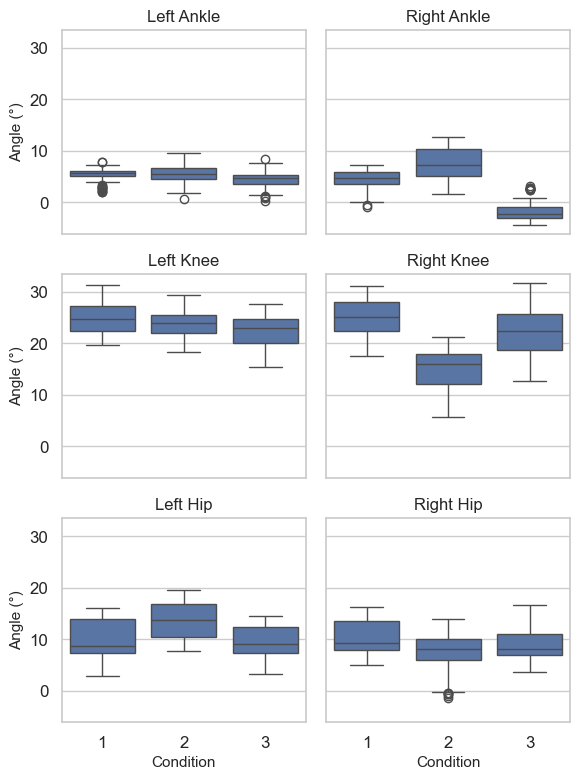

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

leg1_cols = ['leg1_joint1_angle', 'leg1_joint2_angle', 'leg1_joint3_angle']
leg2_cols = ['leg2_joint1_angle', 'leg2_joint2_angle', 'leg2_joint3_angle']
titles = ['Ankle', 'Knee', 'Hip']


fig, axes = plt.subplots(3, 2, figsize=(6,8), sharex=True, sharey=True)

for i in range(3):
    sns.boxplot(x='condition', y=leg1_cols[i], data=df_prep,ax=axes[i, 0])
    axes[i, 0].set_title(f"Left {titles[i]}", fontsize=12)
    axes[i, 0].set_xlabel('') 
    axes[i, 0].set_ylabel('Angle (°)', fontsize=11)

    sns.boxplot(x='condition', y=leg2_cols[i], data=df_prep,ax=axes[i, 1])
    axes[i, 1].set_title(f"Right {titles[i]}", fontsize=12)
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')


for ax in axes[-1, :]:
    ax.set_xlabel('Condition', fontsize=11)

plt.tight_layout()
plt.show()


通过对比左右两列图可以得到，brace会对右侧腿部关节的大致影响，左腿可以视作对照组\
ankle部分，当然受到ankle brace的影响其活动会受限制，但是在with knee brace时，ankle的活动角度普遍升高了\
knee部分，同意会受到对应部分knee brace的影响，而ankle brace 会让他角度活动范围扩大\
hip会受到knee brace的影响，活动角度会缩小


Comparing the left and right columns, the brace mainly affects the right leg; the left leg can be seen as the control group.
For the ankle, movement is restricted under the ankle brace, but appears slightly increased under the knee brace.
For the knee, its movement is restricted under the knee brace, while the ankle brace slightly increases its mobility.
For the hip, the knee brace reduces the range of motion.

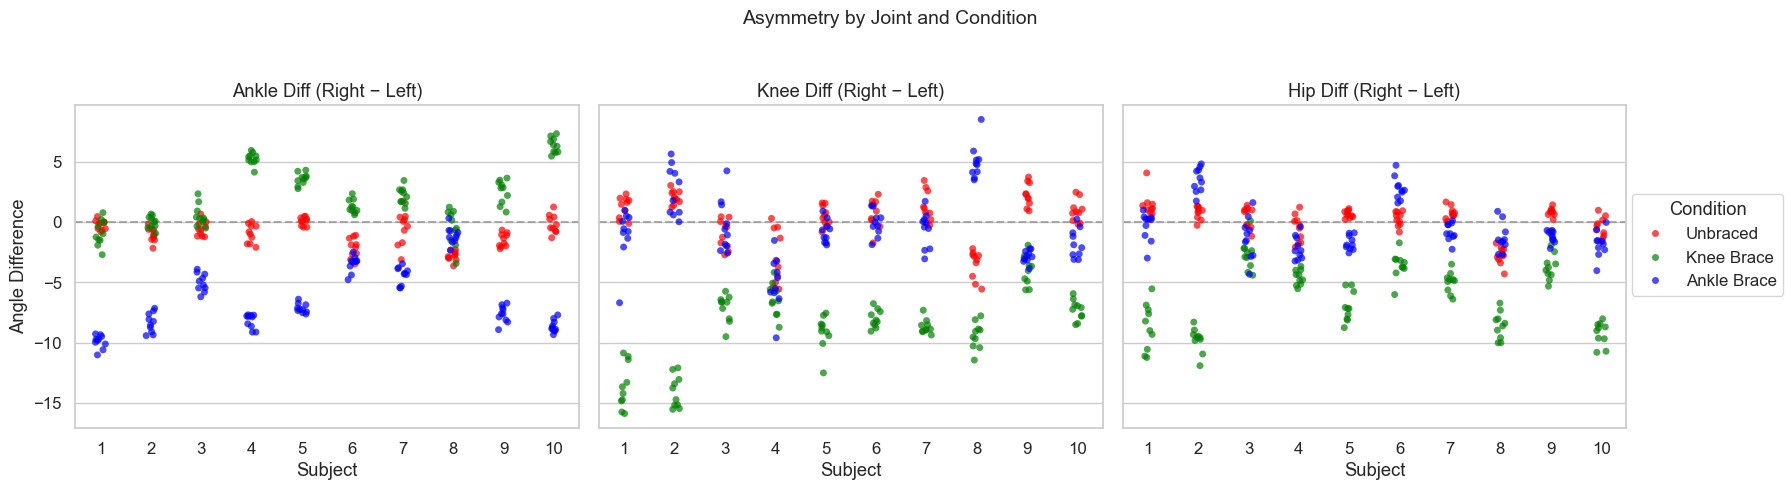

In [93]:
palette = {
    1: 'RED', 
    2: 'GREEN', 
    3: 'BLUE' 
}

diff_vars = ['ankle_diff', 'knee_diff', 'hip_diff']

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, var in zip(axes, diff_vars):
    sns.stripplot(
        data=df_prep,
        x='subject',
        y=var,
        hue='condition',
        palette=palette,
        jitter=True,
        alpha=0.7,
        ax=ax
    )
    ax.axhline(0, color='gray', linestyle='--', alpha=0.6)
    ax.set_title(f'{var.replace("_", " ").title()} (Right − Left)')
    ax.set_xlabel('Subject')
    ax.set_ylabel('Angle Difference')
    ax.legend_.remove()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, ['Unbraced', 'Knee Brace', 'Ankle Brace'], title='Condition', loc='center right')

plt.suptitle('Asymmetry by Joint and Condition', fontsize=14)
plt.tight_layout(rect=[0, 0, 0.92, 0.95])
plt.show()


ankle difference在ankle braze的作用下不对称性是最显著的，右腿ankle部分活动受到了明显限制，但在with knee brace的时候部分subject右侧ankle的活动大于左边\
knee difference在knee braze的作用下不对称性是最显著的，右腿knee部分活动受到了明显限制，在其余两种情况下并没有很明显的差异，只有轻微的波动\
值得注意的是，hip difference在knee braze的作用下不对称性是最显著的，在其余两种情况下并没有很明显的差异，有理由提出假设knee brace会限制hip的活动，或者说在实际中就是患者的knee部分的僵化和受伤在一定程度上也会影响hip

The ankle shows the strongest asymmetry under the ankle brace; right ankle motion is clearly restricted, but under the knee brace some subjects show greater right-ankle motion.
The knee shows the strongest asymmetry under the knee brace; right knee motion is clearly limited, while the other two conditions show only small variations.
Interestingly, the hip shows the greatest asymmetry under the knee brace; this suggests that the knee brace may also restrict hip motion, or that knee stiffness/injury can indirectly affect hip movement.

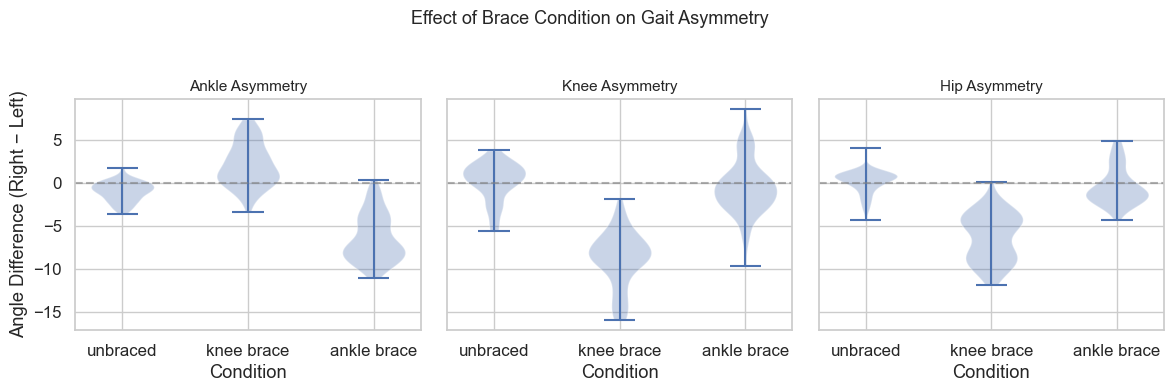

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

# 三个关节对应的列名
joints = ['ankle_diff', 'knee_diff', 'hip_diff']
titles = ['Ankle Asymmetry', 'Knee Asymmetry', 'Hip Asymmetry']

for ax, joint, title in zip(axes, joints, titles):
    # 准备数据
    dataset = [
        df_prep[df_prep['condition'] == 1][joint].values,
        df_prep[df_prep['condition'] == 2][joint].values,
        df_prep[df_prep['condition'] == 3][joint].values
    ]

    # 绘制小提琴图
    ax.violinplot(dataset=dataset)
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(['unbraced', 'knee brace', 'ankle brace'])
    ax.set_title(title, fontsize=11)
    ax.axhline(0, color='gray', linestyle='--', alpha=0.6)
    ax.set_xlabel('Condition')
    if joint == 'ankle_diff':
        ax.set_ylabel('Angle Difference (Right − Left)')

plt.suptitle('Effect of Brace Condition on Gait Asymmetry', fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


可以看到三个关节的asymmetry在加上brace之后极差都显著增大了，可以提出猜想：
ankle和knee的brace都同时会对ankle和knee阐述影响，而knee brace会对hip产生影响，ankle brace的影响不显著

After applying the brace, the range (spread) of asymmetry increases significantly for all three joints, suggesting that
Both the ankle brace and the knee brace affect both the ankle and knee joints, while the knee brace also influences the hip joint, whereas the effect of the ankle brace on the hip is not significant.

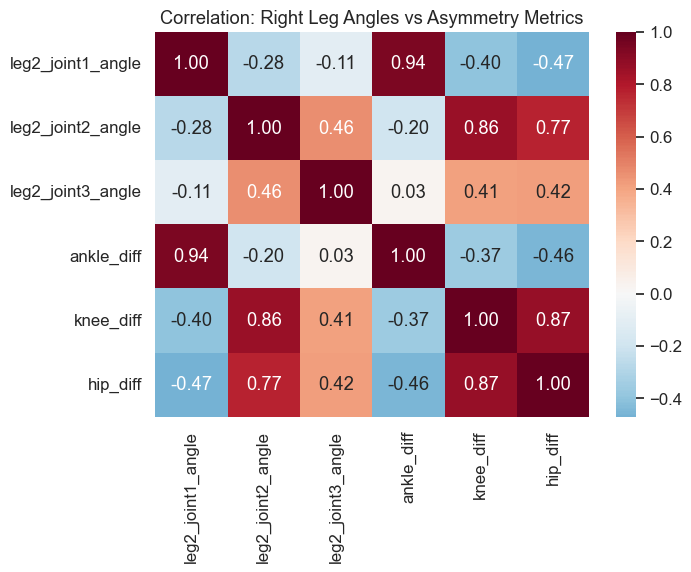

In [47]:
cols = ['leg2_joint1_angle', 'leg2_joint2_angle', 'leg2_joint3_angle', 'ankle_diff', 'knee_diff', 'hip_diff']
corr = df_prep[cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(
    corr,
    annot=True,
    cmap='RdBu_r',
    center=0,
    fmt='.2f'
)
plt.title('Correlation: Right Leg Angles vs Asymmetry Metrics')
plt.show()


可以看到，右脚ankle角度越大，ankle不对称性越强，说明 ankle_diff 很大程度上受右踝运动驱动。右膝角度变化直接导致膝关节不对称性变化，说明knee brace 改变右膝活动幅度导致不对称性上升。
右膝角度变化几乎总是伴随着髋部角度的变化，说明膝关节的受限运动会直接传导影响到髋关节的活动模式。

It can be seen that a larger right-ankle angle corresponds to greater ankle asymmetry, indicating that ankle_diff is largely driven by right-ankle motion.
Changes in the right-knee angle directly lead to variations in knee asymmetry, suggesting that the knee brace increases asymmetry by altering the range of motion of the right knee.
Moreover, changes in the right-knee angle are almost always accompanied by changes in the hip angle, implying that restricted knee motion directly influences the movement pattern of the hip joint.

### Splitting

In [111]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import KFold

X = df_prep[['leg1_joint1_angle','leg1_joint2_angle','leg1_joint3_angle','leg2_joint1_angle','leg2_joint2_angle','leg2_joint3_angle',
              'ankle_diff','knee_diff','hip_diff']]
y = df_prep['condition']
groups = df_prep['subject']

splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_val_idx, test_idx = next(splitter.split(X, y, groups=groups))

X_train_val, X_test = X.iloc[train_val_idx], X.iloc[test_idx]
y_train_val, y_test = y.iloc[train_val_idx], y.iloc[test_idx]
groups_train_val = groups.iloc[train_val_idx]

# print(train_idx)
# print(test_idx)
# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)

from sklearn.model_selection import StratifiedGroupKFold
import numpy as np

random_state = 2
ksplit = StratifiedGroupKFold(n_splits=4, shuffle=True, random_state=random_state)

fold_data = []

for fold, (train_index, val_index) in enumerate(ksplit.split(X_train_val, y_train_val, groups=groups_train_val)):
    # print(f"New fold {fold+1}")
    X_train = X_train_val.iloc[train_index]
    y_train = y_train_val.iloc[train_index]
    X_val = X_train_val.iloc[val_index]
    y_val = y_train_val.iloc[val_index]
    
    # print(np.unique(y_train, return_counts=True))
    # print(np.unique(y_val, return_counts=True))
    
    fold_data.append({
        'fold': fold+1,
        'X_train': X_train,
        'y_train': y_train,
        'X_val': X_val,
        'y_val': y_val
    })

fold_data

[{'fold': 1,
  'X_train':      leg1_joint1_angle  leg1_joint2_angle  leg1_joint3_angle  \
  60            4.171897          21.823147           6.984305   
  61            3.274041          20.240140           5.924125   
  62            4.347485          22.642779           7.108893   
  63            4.489510          21.327117           6.448362   
  64            3.904334          23.377262           8.204960   
  ..                 ...                ...                ...   
  295           4.898748          16.617524          14.213398   
  296           4.279994          17.544801          12.398080   
  297           4.972162          16.358994          13.095796   
  298           5.038511          18.387504          13.683937   
  299           3.908324          18.891068          14.035819   
  
       leg2_joint1_angle  leg2_joint2_angle  leg2_joint3_angle  ankle_diff  \
  60            3.022816          22.248305           7.866673   -1.149082   
  61            2.906173 

### Preprocessing

### 

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

continuous = ['leg1_joint1_angle','leg1_joint2_angle','leg1_joint3_angle','leg2_joint1_angle','leg2_joint2_angle','leg2_joint3_angle',
    'ankle_diff','knee_diff','hip_diff']

def standardize_fold_data(fold_data):
    fold_scaled = []
    for f in fold_data:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), continuous)
        ])
        X_train_scaled = preprocessor.fit_transform(f['X_train'])
        X_val_scaled = preprocessor.transform(f['X_val'])

        fold_scaled.append({
            'fold': f['fold'],
            'X_train_scaled': X_train_scaled,
            'y_train': f['y_train'],
            'X_val_scaled': X_val_scaled,
            'y_val': f['y_val']
        })
    return fold_scaled

fold_scaled_data = standardize_fold_data(fold_data)
fold_scaled_data

[{'fold': 1,
  'X_train_scaled': array([[-0.69857259, -0.50839125, -1.37055544, ...,  0.01402455,
           0.83222045,  1.14559972],
         [-1.36855845, -1.02613228, -1.65854706, ...,  0.19988871,
           0.66041817,  1.3166248 ],
         [-0.56754827, -0.24032091, -1.33671185, ...,  0.06931749,
           0.44026649,  1.19013015],
         ...,
         [-0.10141013, -2.29550694,  0.28959567, ..., -1.85476787,
           0.5258889 ,  0.35574518],
         [-0.05190025, -1.63205871,  0.449361  , ..., -1.82776734,
           0.1003392 ,  0.12201048],
         [-0.895253  , -1.4673622 ,  0.54494745, ..., -1.61188809,
           0.00731867,  0.27638566]], shape=(180, 9)),
  'y_train': 60     1
  61     1
  62     1
  63     1
  64     1
        ..
  295    3
  296    3
  297    3
  298    3
  299    3
  Name: condition, Length: 180, dtype: int64,
  'X_val_scaled': array([[ 2.04678454e+00, -4.96290363e-01, -2.01898748e+00,
           6.71999156e-01,  3.86086754e-01, -1.46860422e+0

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

results = []

for fold_dict in fold_scaled_data:
    fold = fold_dict['fold']
    X_train = fold_dict['X_train_scaled']
    y_train = fold_dict['y_train']
    X_val = fold_dict['X_val_scaled']
    y_val = fold_dict['y_val']
    

    clf = RandomForestClassifier(
        n_estimators=200,      
        max_depth=None,       
        random_state=42
    )
    

    clf.fit(X_train, y_train)
    

    y_pred = clf.predict(X_val)
    

    acc = accuracy_score(y_val, y_pred)
    results.append({'fold': fold, 'accuracy': acc})
    
    print(f"Fold {fold} Accuracy: {acc:.3f}")


mean_acc = sum(r['accuracy'] for r in results) / len(results)
print(f"\nMean Accuracy across folds: {mean_acc:.3f}")


clf_final = RandomForestClassifier(n_estimators=200, random_state=42)
clf_final.fit(X_train_val, y_train_val)

y_pred_test = clf_final.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"\n Final Test Accuracy: {test_acc:.3f}")
print("\nClassification report on test set:")
print(classification_report(y_test, y_pred_test))

Fold 1 Accuracy: 0.833
Fold 2 Accuracy: 0.950
Fold 3 Accuracy: 0.700
Fold 4 Accuracy: 1.000

Mean Accuracy across folds: 0.871

 Final Test Accuracy: 0.867

Classification report on test set:
              precision    recall  f1-score   support

           1       0.71      1.00      0.83        20
           2       1.00      0.60      0.75        20
           3       1.00      1.00      1.00        20

    accuracy                           0.87        60
   macro avg       0.90      0.87      0.86        60
weighted avg       0.90      0.87      0.86        60



In [107]:
from sklearn.model_selection import GroupShuffleSplit, StratifiedGroupKFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

def group_ml_pipe(X, y, groups, preprocessor, model, hyperparameters, score, 
                  randomized_iter, random_seed=1030):
    """
    A function to perform grouped model training and hyperparameter optimization
    using cross-validation.

    Parameters
    ----------
    X : DataFrame
        Feature matrix before preprocessing.
    y : Series
        Target variable.
    groups : Series
        Group labels (e.g., subject IDs) to ensure samples from the same group 
        are not split across train/test folds.
    preprocessor : sklearn ColumnTransformer or None
        Preprocessing pipeline (e.g., StandardScaler).
    model : sklearn estimator
        Initialized ML model (e.g., RandomForestClassifier()).
    hyperparameters : dict
        Parameter grid to pass to GridSearchCV.
    score : str or sklearn scorer
        Metric for evaluating model performance (e.g., 'accuracy', 'f1_macro').
    randomized_iter : int
        Number of randomized runs (with different random seeds).
    random_seed : int
        Base seed used to vary random_state across trials.

    Returns
    -------
    trial_results : list of dictionaries
        Each dictionary contains information about one randomized trial,
        including best params, test score, and predictions.
    """

    trial_results = [] 
    
    for i in range(1, randomized_iter + 1):
        print(f"\nRunning trial {i}")
        random_state = random_seed * i
        
        iter_info = {'trial_iter': i, 'random_state': random_state}
        
        gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=random_state)
        other_idx, test_idx = next(gss.split(X, y, groups=groups))
        
        X_other, y_other, groups_other = X.iloc[other_idx], y.iloc[other_idx], groups.iloc[other_idx]
        X_test, y_test, groups_test = X.iloc[test_idx], y.iloc[test_idx], groups.iloc[test_idx]
        
        cv = StratifiedGroupKFold(n_splits=4, shuffle=True, random_state=random_state)
        
        pipe = make_pipeline(preprocessor, model)
        
        grid = GridSearchCV(
            pipe,
            param_grid=hyperparameters,
            scoring=score,
            cv=cv,
            n_jobs=-1,
            verbose=True,
            return_train_score=True
        )
        
        grid.fit(X_other, y_other, groups=groups_other)
        
        test_score = grid.score(X_test, y_test)
        y_pred = grid.predict(X_test)
        
        iter_info['grid'] = grid
        iter_info['best_params'] = grid.best_params_
        iter_info['best_cv_score'] = grid.best_score_
        iter_info['test_score'] = test_score
        iter_info['y_test_pred'] = y_pred
        
        print(f"Trial {i} completed — Best CV score: {grid.best_score_:.3f}, Test score: {test_score:.3f}")
        trial_results.append(iter_info)
    
    return trial_results


def gather_trial_results(df, exclftrs, target, groupftr, preprocessor, model, 
                         hyperparameters, score, trials, trial_type):
    """
    Extracts feature, target, and group columns from df, 
    runs grouped ML pipeline multiple times, 
    and tags each trial result with its type.
    """
    X = df.drop(columns=exclftrs)
    y = df[target]
    groups = df[groupftr]
    
    trial_results = group_ml_pipe(
        X, y, groups, preprocessor, model, 
        hyperparameters, score, randomized_iter=trials
    )
    
    for result in trial_results:
        result['trial_type'] = trial_type
    
    return trial_results


In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

continuous = ['leg1_joint1_angle','leg1_joint2_angle','leg1_joint3_angle',
              'leg2_joint1_angle','leg2_joint2_angle','leg2_joint3_angle',
              'ankle_diff','knee_diff','hip_diff']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), continuous)
])

hyperparams = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 5, 10]
}

results = gather_trial_results(
    df=df_prep,
    exclftrs=['condition', 'subject'], 
    target='condition',
    groupftr='subject',
    preprocessor=preprocessor,
    model=RandomForestClassifier(random_state=42),
    hyperparameters=hyperparams,
    score='accuracy',
    trials=3,
    trial_type='RandomForest'
)



Running trial 1
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Trial 1 completed — Best CV score: 0.854, Test score: 0.900

Running trial 2
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Trial 2 completed — Best CV score: 0.938, Test score: 0.683

Running trial 3
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Trial 3 completed — Best CV score: 0.896, Test score: 0.833
